In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# load data
import pandas as pd
# load data
df=pd.read_excel('CCPP/Folds5x2_pp.xlsx')
# del df['Date']
# del df['Next_Tmax'] #Next_Tmin
# drop nan 
df = df.dropna()
# the head of df
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
# df to values
df = df.values
Y = df[:,4]
X = df[:,0:4]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(9568, 4, 1)


In [5]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
x_test.shape

(1914, 4, 1)

In [7]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [8]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
#     model.add(Conv1D(128, 3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [9]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 7654 samples, validate on 1914 samples
Epoch 1/250
7654/7654 [==============================] - 3s 329us/step - loss: 141148.6720 - val_loss: 51951.4185
Epoch 2/250
7654/7654 [==============================] - 2s 300us/step - loss: 25022.0800 - val_loss: 10151.5188
Epoch 3/250
7654/7654 [==============================] - 2s 305us/step - loss: 13015.1606 - val_loss: 5094.3776
Epoch 4/250
7654/7654 [==============================] - 2s 297us/step - loss: 9272.0667 - val_loss: 2331.5553
Epoch 5/250
7654/7654 [==============================] - 2s 325us/step - loss: 7256.6957 - val_loss: 1248.7007
Epoch 6/250
7654/7654 [==============================] - 2s 306us/step - loss: 6361.3713 - val_loss: 752.2241
Epoch 7/250
7654/7654 [==============================] - 2s 297us/step - loss: 5924.4837 - val_loss: 585.1581
Epoch 8/250
7654/7654 [==============================] - 2s 298us/step - loss: 5792.8962

7654/7654 [==============================] - 2s 297us/step - loss: 4568.2364 - val_loss: 97.0350
Epoch 67/250
7654/7654 [==============================] - 2s 315us/step - loss: 4417.5660 - val_loss: 132.7101
Epoch 68/250
7654/7654 [==============================] - 2s 308us/step - loss: 4584.2602 - val_loss: 151.8824
Epoch 69/250
7654/7654 [==============================] - 2s 294us/step - loss: 4636.4926 - val_loss: 158.9053
Epoch 70/250
7654/7654 [==============================] - 2s 294us/step - loss: 4540.9157 - val_loss: 130.6196
Epoch 71/250
7654/7654 [==============================] - 2s 293us/step - loss: 4553.8184 - val_loss: 160.9813
Epoch 72/250
7654/7654 [==============================] - 2s 296us/step - loss: 4521.7274 - val_loss: 141.8307
Epoch 73/250
7654/7654 [==============================] - 2s 297us/step - loss: 4441.5782 - val_loss: 157.3794
Epoch 74/250
7654/7654 [==============================] - 2s 315us/step - loss: 4376.8363 - val_loss: 154.9684
Epoch 75/250
76

7654/7654 [==============================] - 2s 296us/step - loss: 3748.5576 - val_loss: 134.6143
Epoch 140/250
7654/7654 [==============================] - 2s 294us/step - loss: 3677.8480 - val_loss: 140.7604
Epoch 141/250
7654/7654 [==============================] - 2s 305us/step - loss: 3711.7522 - val_loss: 137.8581
Epoch 142/250
7654/7654 [==============================] - 2s 294us/step - loss: 3681.5148 - val_loss: 143.5897
Epoch 143/250
7654/7654 [==============================] - 2s 295us/step - loss: 3661.8885 - val_loss: 92.8462
Epoch 144/250
7654/7654 [==============================] - 2s 323us/step - loss: 3784.1708 - val_loss: 104.4726
Epoch 145/250
7654/7654 [==============================] - 2s 293us/step - loss: 3688.7291 - val_loss: 117.6290
Epoch 146/250
7654/7654 [==============================] - 2s 296us/step - loss: 3758.4381 - val_loss: 120.3471
Epoch 147/250
7654/7654 [==============================] - 2s 300us/step - loss: 3663.9366 - val_loss: 138.7843
Epoch 1

7654/7654 [==============================] - 2s 294us/step - loss: 3121.6010 - val_loss: 97.2600
Epoch 213/250
7654/7654 [==============================] - 2s 324us/step - loss: 3059.4319 - val_loss: 119.3813
Epoch 214/250
7654/7654 [==============================] - 2s 292us/step - loss: 3060.5919 - val_loss: 76.1735
Epoch 215/250
7654/7654 [==============================] - 2s 295us/step - loss: 3082.3005 - val_loss: 151.1299
Epoch 216/250
7654/7654 [==============================] - 2s 293us/step - loss: 2993.4486 - val_loss: 174.9949
Epoch 217/250
7654/7654 [==============================] - 2s 295us/step - loss: 2984.9598 - val_loss: 101.1841
Epoch 218/250
7654/7654 [==============================] - 2s 295us/step - loss: 3118.6982 - val_loss: 156.0389
Epoch 219/250
7654/7654 [==============================] - 2s 295us/step - loss: 3051.0407 - val_loss: 135.9813
Epoch 220/250
7654/7654 [==============================] - 2s 325us/step - loss: 3008.7227 - val_loss: 86.7188
Epoch 221

In [10]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

7654/7654 [==============================] - 0s 21us/step
 Model.evaluate :  104.22526198826479 

Mean Squa Error : 103.97355503014487
Mean Abso Error : 8.931542982781071
Expl. Variance  : 0.8943818722069423


In [11]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


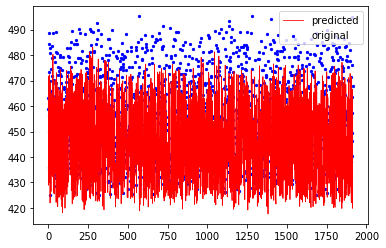

In [12]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

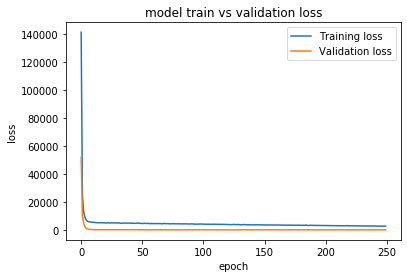

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [14]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [15]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [16]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (7654, 1)
Training Labels (from CNN) Shape: (7654,) 

Test Features (from CNN) Shape: (1914, 1)
Test Labels (from CNN) Shape: (1914,) 

Test Features original Shape: (7654, 4, 1)
Test Features original Shape: (1914, 4, 1)


### Classification by CNN + Random Forest + MLP

In [17]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
# epochs=optimal['epochs']

batchsize=304
learnrate=0.002474296684203603
epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Epoch: 0001 cost= 0.397026605
Epoch: 0002 cost= 0.068964306
Epoch: 0003 cost= 0.040548795
Epoch: 0004 cost= 0.032680609
Epoch: 0005 cost= 0.023453800
Epoch: 0006 cost= 0.014350142
Epoch: 0007 cost= 0.007974462
Epoch: 0008 cost= 0.005441121
Epoch: 0009 cost= 0.005325003
Epoch: 0010 cost= 0.005386843
Epoch: 0011 cost= 0.005369321
Epoch: 0012 cost= 0.005291299
Epoch: 0013 cost= 0.005098262
Epoch: 0014 cost= 0.005246503
Epoch: 0015 cost= 0.005210182
Epoch: 0016 cost= 0.005095919
Epoch: 0017 cost= 0

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 30.270413599117287
Mean Abso Error : 4.384470304770156
Expl. Variance  : 0.8992686547699327 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [18]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 30.275702180095543
Mean Abso Error : 4.3457315649952255
Expl. Variance  : 0.8991320953958977 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 6.856744280844701e+26
Mean Abso Error : 26168103288539.19
Expl. Variance  : -3.0181021315611964e+21 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

M

In [19]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

CNN XGBRegressor      
Mean Squa Error : 32.2544146089795
Mean Abso Error : 4.462893221385801
Expl. Variance  : 0.8924105921727137 

CNN ExtraTreesRegressor      
Mean Squa Error : 48.017189945271696
Mean Abso Error : 5.345745820271684
Expl. Variance  : 0.8398399504220132 

CNN DecisionTreeRegressor      
Mean Squa Error : 57.54746899164054
Mean Abso Error : 5.8583699059561125
Expl. Variance  : 0.8080818247488795 



In [20]:
out_cnn_train.shape

(7654, 1)

###  MLP

In [21]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)



Epoch 1/50
7654/7654 [==============================] - 2s 289us/step - loss: 1471112.0939
Epoch 2/50
7654/7654 [==============================] - 2s 241us/step - loss: 1295852.6810
Epoch 3/50
7654/7654 [==============================] - 2s 238us/step - loss: 1301732.1349
Epoch 4/50
7654/7654 [==============================] - 2s 243us/step - loss: 1302407.9748
Epoch 5/50
7654/7654 [==============================] - 2s 233us/step - loss: 1294576.7993
Epoch 6/50
7654/7654 [==============================] - 2s 238us/step - loss: 1298579.8777
Epoch 7/50
7654/7654 [==============================] - 2s 238us/step - loss: 1303236.6790
Epoch 8/50
7654/7654 [==============================] - 2s 238us/step - loss: 1297037.0035
Epoch 9/50
7654/7654 [==============================] - 2s 255us/step - loss: 1297140.5023
Epoch 10/50
7654/7654 [==============================] - 2s 246us/step - loss: 1296538.5429
Epoch 11/50
7654/7654 [==============================] - 2s 235us/step - loss: 1297086.

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [22]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [23]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)

CNN RandomForestRegressor      
Mean Squa Error : 9.741312037706342
Mean Abso Error : 2.2888140543364597
Expl. Variance  : 0.967506932557853 

CNN XGBRegressor      
Mean Squa Error : 9.160980036551427
Mean Abso Error : 2.2364909957519012
Expl. Variance  : 0.9694422805677624 

CNN ExtraTreesRegressor      
Mean Squa Error : 11.593332050679194
Mean Abso Error : 2.4890391849529783
Expl. Variance  : 0.9613560113816303 

